In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')
plt.style.use('ggplot')

[nltk_data] Downloading package punkt to C:\Users\Rahul
[nltk_data]     Agrawal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Rahul Agrawal\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to C:\Users\Rahul
[nltk_data]     Agrawal\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to C:\Users\Rahul
[nltk_data]     Agrawal\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\Rahul
[nltk_data]     Agrawal\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [4]:
df = pd.read_csv("comments_final1.csv")
df

,ID,BrandName,ItemCode,Rating,Review,UserName,Month,Year,UserCertified,Place
0,0,indi_club,ateoz80EHr,5,Super quality,Ramsheeq Mohamed,Feb,2023.0,Certified Buyer,Malappuram District
1,1,indi_club,ateoz80EHr,5,Nice product.,Flipkart Customer,Oct,2023.0,Certified Buyer,Purba Medinipur District
2,2,indi_club,ateoz80EHr,5,You will not get any better product at this pr...,AJAY,Aug,2023.0,Certified Buyer,Raipur
3,3,indi_club,ateoz80EHr,5,best,Flipkart Customer,Jan,2024.0,Certified Buyer,Gurugram
4,4,indi_club,ateoz80EHr,4,Love it,Vishal Walia,Jan,2024.0,Certified Buyer,Pundri
...,...,...,...,...,...,...,...,...,...,...
393051,393051,vebnor_1,xhMEXVtHuU,2,Worst,Flipkart Customer,Mar,2022.0,Certified Buyer,Mandya District
393052,393052,vebnor_1,xhMEXVtHuU,1,Ridiculous product..There is no return policy ...,Mukarram Mohammed,Mar,2022.0,Certified Buyer,Hyderabad
393053,393053,vebnor_1,xhMEXVtHuU,4,Good product 👌,Tamil meac,Mar,2022.0,Certified Buyer,Dindigul District
393054,393054,vebnor_1,xhMEXVtHuU,5,Suuper product,Aans Sr,Mar,2022.0,Certified Buyer,Neyyattinkara


In [5]:
sid = SentimentIntensityAnalyzer()

# Function to get sentiment scores using VADER
def get_vader_scores(text):
    scores = sid.polarity_scores(str(text))
    return scores

# Apply VADER sentiment analysis to the 'Review' column
df['VaderScores'] = df['Review'].apply(get_vader_scores)

# Extract compound, positive, neutral, and negative scores into separate columns
df[['Negative', 'Neutral', 'Positive', 'Compound']] = pd.DataFrame(df['VaderScores'].tolist(), index=df.index)

# Classify sentiment based on the compound score
df['Sentiment'] = df['Compound'].apply(lambda x: 'positive' if x >= 0.05 else ('negative' if x <= -0.05 else 'neutral'))

df

,ID,BrandName,ItemCode,Rating,Review,UserName,Month,Year,UserCertified,Place,VaderScores,Negative,Neutral,Positive,Compound,Sentiment
0,0,indi_club,ateoz80EHr,5,Super quality,Ramsheeq Mohamed,Feb,2023.0,Certified Buyer,Malappuram District,"{'neg': 0.0, 'neu': 0.204, 'pos': 0.796, 'comp...",0.000,0.204,0.796,0.5994,positive
1,1,indi_club,ateoz80EHr,5,Nice product.,Flipkart Customer,Oct,2023.0,Certified Buyer,Purba Medinipur District,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp...",0.000,0.263,0.737,0.4215,positive
2,2,indi_club,ateoz80EHr,5,You will not get any better product at this pr...,AJAY,Aug,2023.0,Certified Buyer,Raipur,"{'neg': 0.114, 'neu': 0.711, 'pos': 0.175, 'co...",0.114,0.711,0.175,0.3169,positive
3,3,indi_club,ateoz80EHr,5,best,Flipkart Customer,Jan,2024.0,Certified Buyer,Gurugram,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.000,0.000,1.000,0.6369,positive
4,4,indi_club,ateoz80EHr,4,Love it,Vishal Walia,Jan,2024.0,Certified Buyer,Pundri,"{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'comp...",0.000,0.192,0.808,0.6369,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393051,393051,vebnor_1,xhMEXVtHuU,2,Worst,Flipkart Customer,Mar,2022.0,Certified Buyer,Mandya District,"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.000,0.000,0.000,-0.6249,negative
393052,393052,vebnor_1,xhMEXVtHuU,1,Ridiculous product..There is no return policy ...,Mukarram Mohammed,Mar,2022.0,Certified Buyer,Hyderabad,"{'neg': 0.411, 'neu': 0.589, 'pos': 0.0, 'comp...",0.411,0.589,0.000,-0.6476,negative
393053,393053,vebnor_1,xhMEXVtHuU,4,Good product 👌,Tamil meac,Mar,2022.0,Certified Buyer,Dindigul District,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...",0.000,0.256,0.744,0.4404,positive
393054,393054,vebnor_1,xhMEXVtHuU,5,Suuper product,Aans Sr,Mar,2022.0,Certified Buyer,Neyyattinkara,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,neutral


In [6]:
df.to_csv("sentiment_analysis_data.csv")

# 1. Sentiment Scores Distribution by Brands



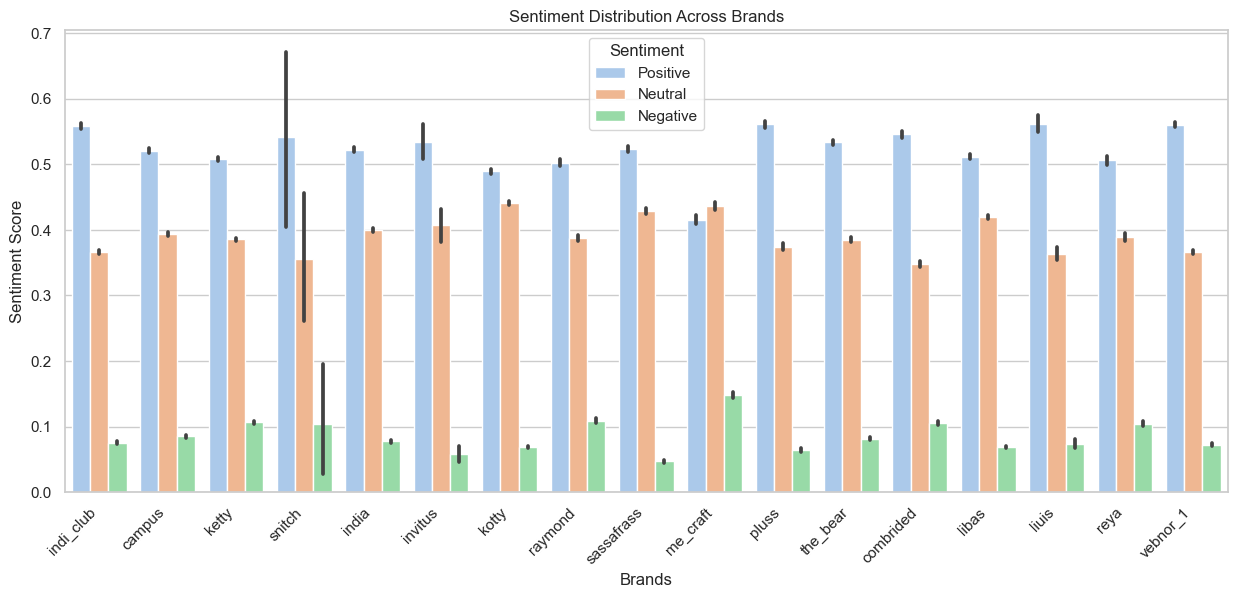

In [7]:
# Set the seaborn style
sns.set(style="whitegrid")

# Assuming 'df' DataFrame contains 'BrandName', 'Positive', 'Neutral', 'Negative' columns

# Melt the DataFrame to reshape it for Seaborn's barplot
melted_df = pd.melt(df, id_vars=['BrandName'], value_vars=['Positive', 'Neutral', 'Negative'],
                    var_name='Sentiment', value_name='Score')

# Bar chart for positive, neutral, and negative values
plt.figure(figsize=(15, 6))
sns.barplot(x='BrandName', y='Score', hue='Sentiment', data=melted_df, palette='pastel')
plt.title('Sentiment Distribution Across Brands')
plt.xlabel('Brands')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45, ha='right')
plt.show()


## 2. Top 5 brands by Average Positive Scores 

In [8]:
# grouping dataframe by BrandName:
gdf = df.groupby('BrandName')
for a,b in gdf:
    print(a, "-->\n", b)

campus -->
           ID BrandName    ItemCode  Rating  \
24716  24716    campus  EImyd0Ckw4       5   
24717  24717    campus  EImyd0Ckw4       1   
24718  24718    campus  EImyd0Ckw4       3   
24719  24719    campus  EImyd0Ckw4       5   
24720  24720    campus  EImyd0Ckw4       5   
...      ...       ...         ...     ...   
61726  61726    campus  mhPATsFywS       5   
61727  61727    campus  mhPATsFywS       5   
61728  61728    campus  mhPATsFywS       1   
61729  61729    campus  mhPATsFywS       5   
61730  61730    campus  mhPATsFywS       2   

                                                  Review             UserName  \
24716                                     Nice I like it        Kishan  Kumar   
24717                                    Very bad fabric        Jyoti  Lohani   
24718                                  Okok type product       PRASHANT SINGH   
24719                                    Good..go for it       Ramesh  Nandan   
24720                         

In [9]:
gdf

In [10]:
average_positive_by_brand = round(gdf['Positive'].mean(), 3)
top_positive_brands = average_positive_by_brand.sort_values(ascending=False).head(5)
print(top_positive_brands)

BrandName
liuis        0.562
pluss        0.561
vebnor_1     0.561
indi_club    0.558
combrided    0.546
Name: Positive, dtype: float64


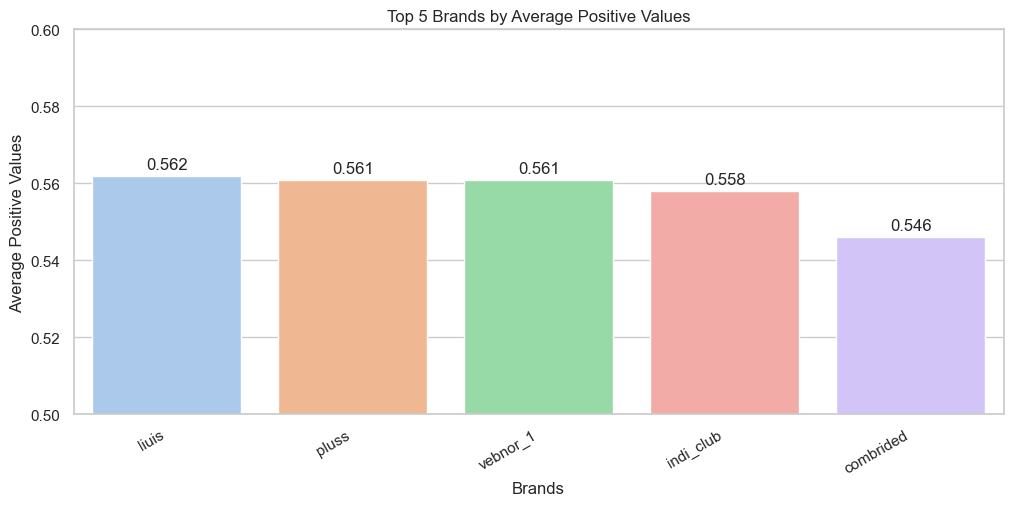

In [11]:
# Set the seaborn style
sns.set(style="whitegrid")

# Bar chart for top 5 brands by average positive values
plt.figure(figsize=(12, 5))
bar_plot = sns.barplot(x=top_positive_brands.index, y=top_positive_brands.values, palette='pastel')

plt.title('Top 5 Brands by Average Positive Values')
plt.xlabel('Brands')
plt.ylabel('Average Positive Values')

# Set y-axis limits between 0.5 and 0.6
plt.ylim(0.5, 0.6)

# Add labels to each bar
for i, v in enumerate(top_positive_brands.values):
    bar_plot.text(i, v + 0.001, f'{v:.3f}', ha='center', va='bottom')

plt.xticks(rotation=30, ha='right')
plt.show()

# 3. Top 5 brands by Average Negative Scores 

In [12]:
average_negative_by_brand = round(gdf['Negative'].mean(), 3)
top_negative_brands = average_negative_by_brand.sort_values(ascending=False).head(5)
print(top_negative_brands)

BrandName
me_craft     0.148
raymond      0.109
ketty        0.107
reya         0.105
combrided    0.105
Name: Negative, dtype: float64


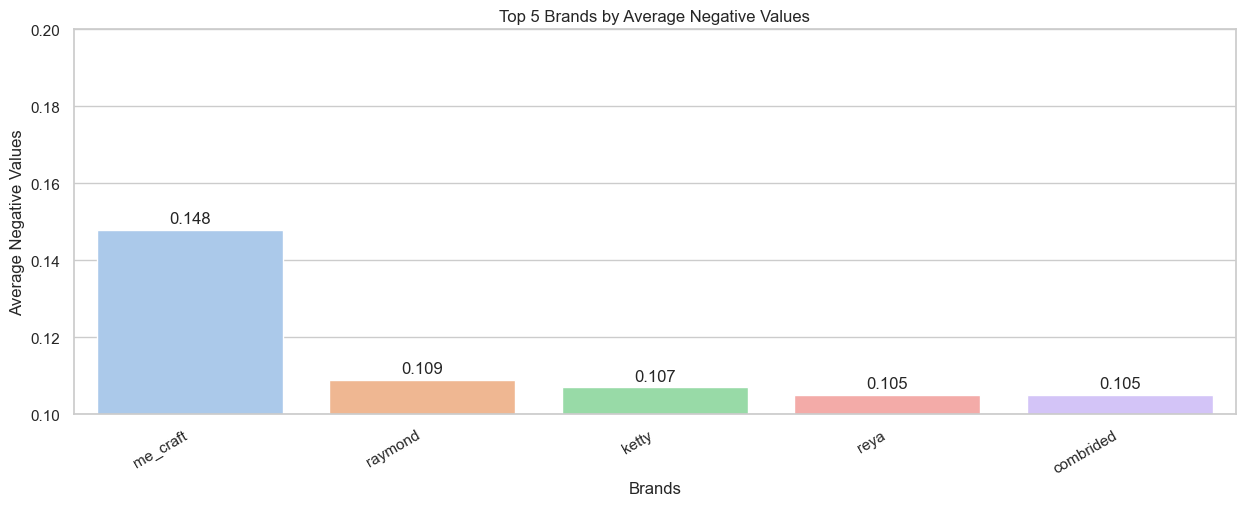

In [13]:
# Set the seaborn style
sns.set(style="whitegrid")

# Bar chart for top 5 brands by average positive values
plt.figure(figsize=(15, 5))
bar_plot = sns.barplot(x=top_negative_brands.index, y=top_negative_brands.values, palette='pastel')

plt.title('Top 5 Brands by Average Negative Values')
plt.xlabel('Brands')
plt.ylabel('Average Negative Values')

# Set y-axis limits between 0.5 and 0.6
plt.ylim(0.1, 0.2)

# Add labels to each bar
for i, v in enumerate(top_negative_brands.values):
    bar_plot.text(i, v + 0.001, f'{v:.3f}', ha='center', va='bottom')

plt.xticks(rotation=30, ha='right')
plt.show()

# 4. Top 5 Products of Highest Positive Scoring Brands

In [15]:
posb = average_positive_by_brand.sort_values(ascending=False).head(5)
negb = average_negative_by_brand.sort_values(ascending=False).head(5)
posbl = posb.index.tolist()
negbl = negb.index.tolist()

In [16]:
bl = []
inl = []
val = []
for a in posbl:
    adf = gdf.get_group(a)
    gadf = adf.groupby('ItemCode')
    top_products_top_brands = round(gadf['Positive'].mean(), 3).sort_values(ascending=False).head(5)
    bl.append(a)
    inl.append(top_products_top_brands.index.tolist())
    val.append(top_products_top_brands.values.tolist())

In [17]:
il=[]
ll=[]
ml=[]
for i,j,k in zip(bl,inl,val):
    for l,m in zip(j,k):
        il.append(i)
        ll.append(l)
        ml.append(m)
df1=pd.DataFrame({'BrandName':il,'ItemCode':ll,'Average_positive':ml})

In [18]:
df1

,BrandName,ItemCode,Average_positive
0,liuis,iursJwQIy3,0.935
1,liuis,qnmFTEJBWd,0.846
2,liuis,CIzrdY7Qpu,0.821
3,liuis,1g7Q2oNvfU,0.723
4,liuis,hXHd2S6JQj,0.723
5,pluss,URezarTncQ,0.919
6,pluss,Gg9dMatYiE,0.793
7,pluss,s2Ol0xM3TG,0.780
8,pluss,phB5gelsib,0.757
9,pluss,4tFmqZN6MB,0.748


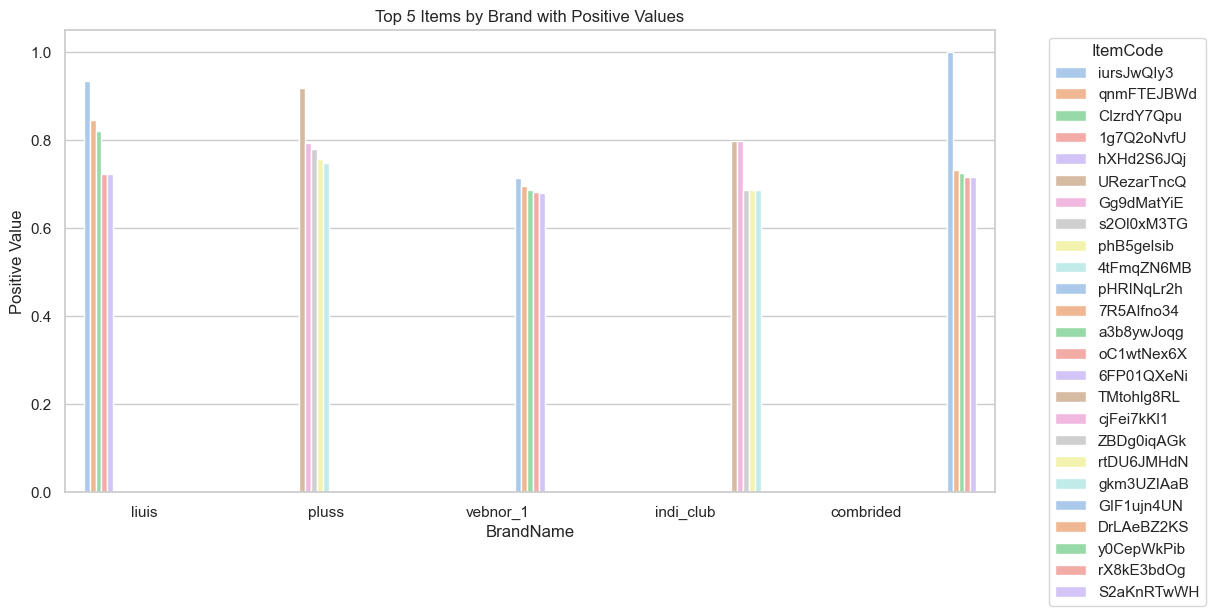

In [19]:
# Set the seaborn style
sns.set(style="whitegrid")

# Melt the DataFrame to reshape it for Seaborn's barplot
melted_df = pd.melt(df1, id_vars=['BrandName', 'ItemCode'], value_vars=['Average_positive'],
                    var_name='Metric', value_name='Value')

# Bar chart for top 5 items by brand
plt.figure(figsize=(12, 6))
# Set the bar_width
bar_width_inner = 0.5
sns.barplot(x='BrandName', y='Value', hue='ItemCode', data=melted_df, palette='pastel', dodge=True)
plt.title('Top 5 Items by Brand with Positive Values')
plt.xlabel('BrandName')
plt.ylabel('Positive Value')
plt.legend(title='ItemCode', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
plt.xticks(ha='right')
plt.show()

# 5. Top 5 Products of Highest Negative Scoring Brands

In [20]:
bl = []
inl = []
val = []
for a in negbl:
    adf = gdf.get_group(a)
    gadf = adf.groupby('ItemCode')
    top_products_top_brands = round(gadf['Negative'].mean(), 3).sort_values(ascending=False).head(5)
    bl.append(a)
    inl.append(top_products_top_brands.index.tolist())
    val.append(top_products_top_brands.values.tolist())

In [21]:
il=[]
ll=[]
ml=[]
for i,j,k in zip(bl,inl,val):
    for l,m in zip(j,k):
        il.append(i)
        ll.append(l)
        ml.append(m)
df1=pd.DataFrame({'BrandName':il,'ItemCode':ll,'Average_negative':ml})

In [22]:
df1

,BrandName,ItemCode,Average_negative
0,me_craft,kTGDeVvBCu,0.420
1,me_craft,c3KQF7RSUm,0.420
2,me_craft,F6hs2pz50d,0.420
3,me_craft,L4rfEWwCcP,0.420
4,me_craft,6T3V9Gw4RB,0.420
5,raymond,yCj6i4wm5N,0.313
6,raymond,7B6Nc1vFuH,0.280
7,raymond,OMncVC7U3B,0.280
8,raymond,tF6yiJmP7e,0.275
9,raymond,yVhvgLUj8K,0.253


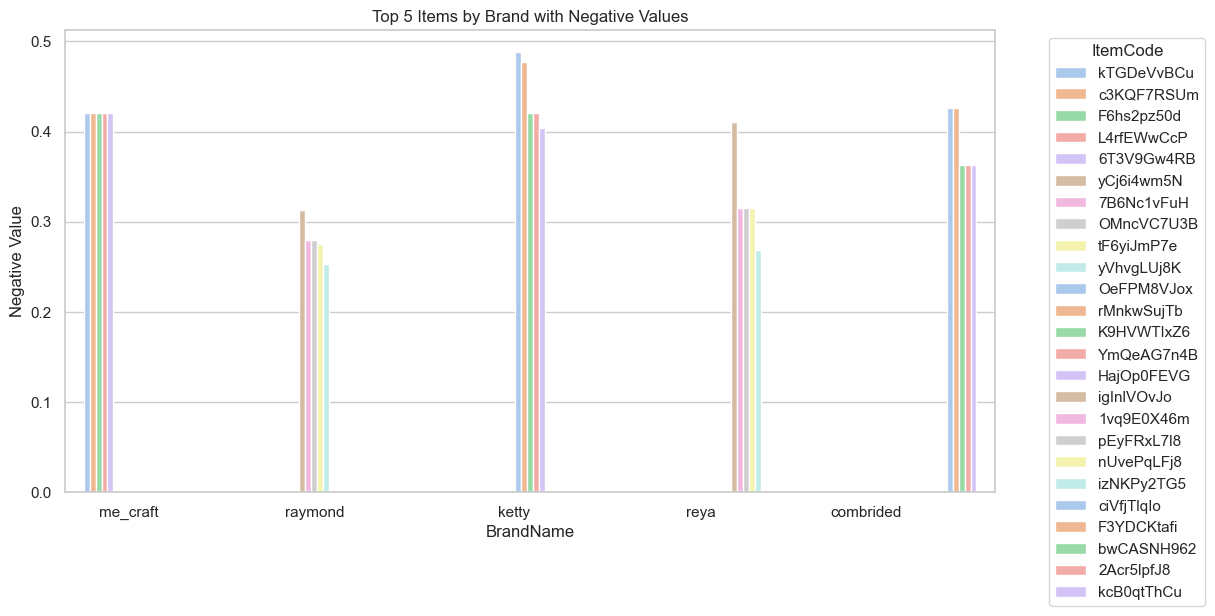

In [23]:
# Set the seaborn style
sns.set(style="whitegrid")

# Melt the DataFrame to reshape it for Seaborn's barplot
melted_df = pd.melt(df1, id_vars=['BrandName', 'ItemCode'], value_vars=['Average_negative'],
                    var_name='Metric', value_name='Value')
# Bar chart for top 5 items by brand
plt.figure(figsize=(12, 6))
# Set the bar_width
bar_width_inner = 0.5
sns.barplot(x='BrandName', y='Value', hue='ItemCode', data=melted_df, palette='pastel', dodge=True)
plt.title('Top 5 Items by Brand with Negative Values')
plt.xlabel('BrandName')
plt.ylabel('Negative Value')
plt.legend(title='ItemCode', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
plt.xticks(ha='right')
plt.show()